<a href="https://colab.research.google.com/github/Nivedhidha-I/Prescription-Reader/blob/main/Prescription_Reader_using_Detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/Prescription Reader/

/content/drive/Shareddrives/Prescription Reader


In [ ]:
!pip install -U torch==1.10 torchvision -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 21.0 MB 57.5 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 57.7 MB/s 
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-kwlrs0hj
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-kwlrs0hj
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65101 sha256=44401056230ba225e698ca7b874f6913c0ffc4ecac91936503a8d4d558b5b873
  Stored in directory: /tmp/pip-ephem-wheel-cache-d3j06llg/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 274 kB 

In [ ]:
#install detecron2
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/drive/Shareddrives/Prescription%20Reader/detectron2_repo
     |████████████████████████████████| 106 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 145 kB 41.9 MB/s 
     |████████████████████████████████| 130 kB 50.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 749 kB 48.8 MB/s 
     |████████████████████████████████| 843 kB 21.3 MB/s 
     |████████████████████████████████| 112 kB 51.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=d15d91565a1129eda892dd80cc1bad34a128f928113c15d2f2af698506b9e9a1
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/33683

In [ ]:
cd /content/drive/Shareddrives/Prescription Reader/

/content/drive/Shareddrives/Prescription Reader


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [ ]:
!curl -L "https://drive.google.com/drive/folders/0AMP0YTchbjKBUk9PVA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 93351    0 93351    0     0   440k      0 --:--:-- --:--:-- --:--:--  440k
Archive:  roboflow.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of roboflow.zip or
        roboflow.zip.zip, and cannot find roboflow.zip.ZIP, period.


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train", {}, "/content/drive/Shareddrives/Prescription Reader/Train/train.json", "/content/drive/Shareddrives/Prescription Reader/Train/")
register_coco_instances("test", {}, "/content/drive/Shareddrives/Prescription Reader/Test/test.json", "/content/drive/Shareddrives/Prescription Reader/Test/")

WARNING [03/29 05:34:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/29 05:34:57 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/drive/Shareddrives/Prescription Reader/Train/train.json


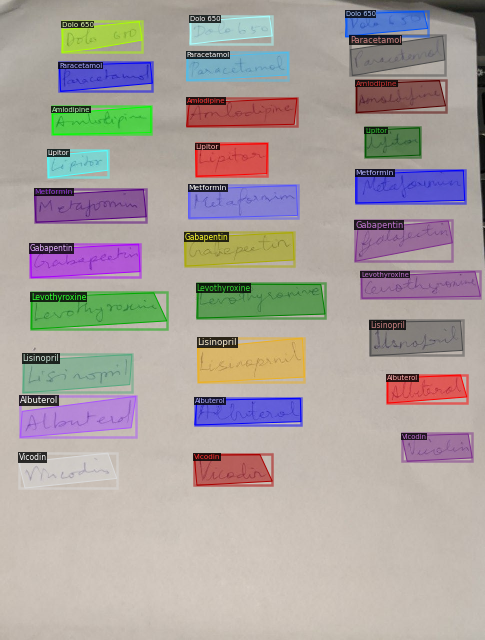

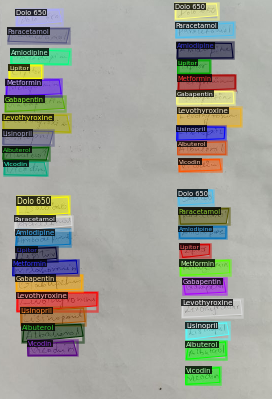

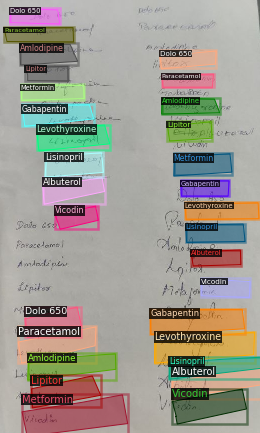

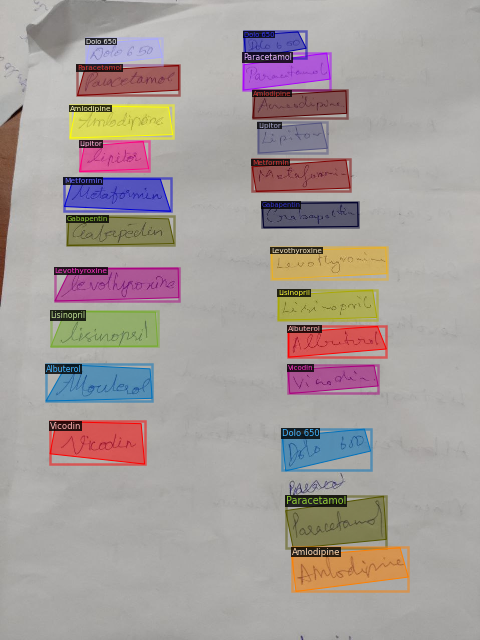

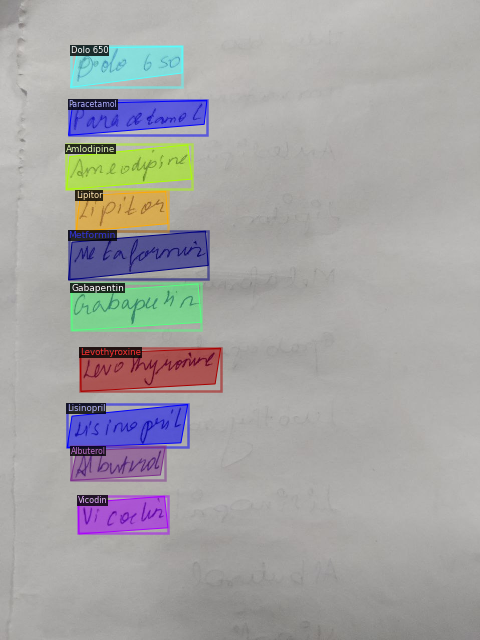

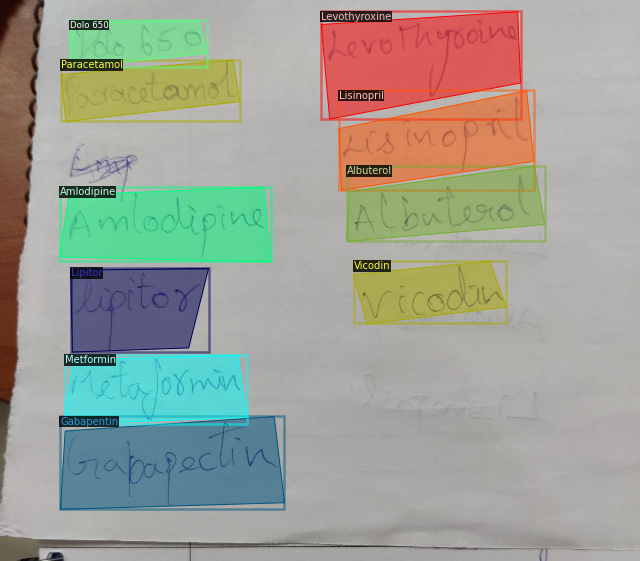

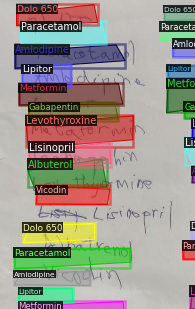

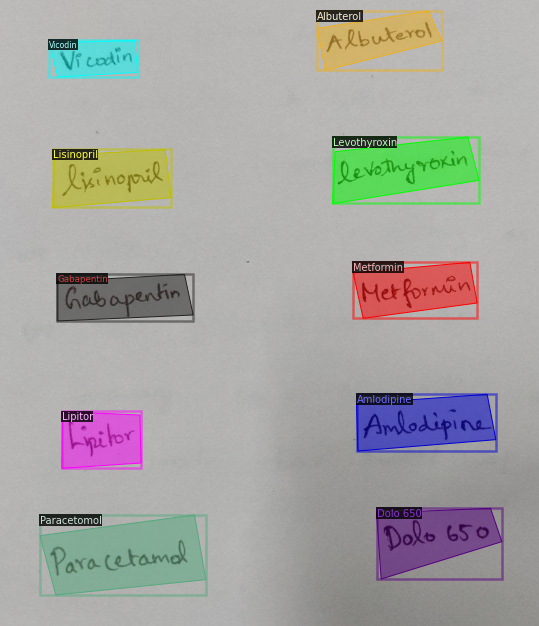

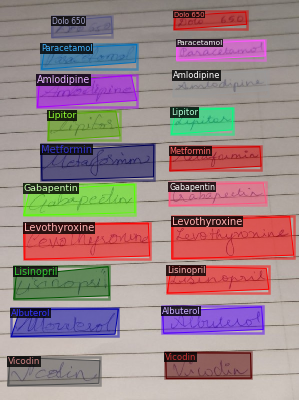

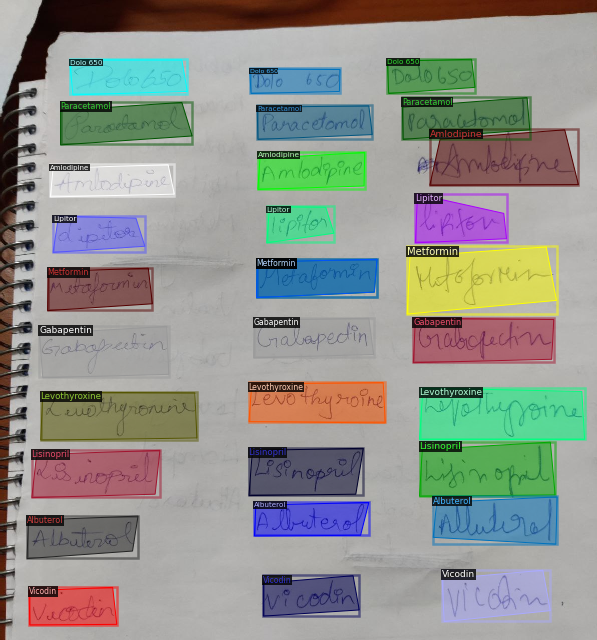

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("train")
dataset_dicts = DatasetCatalog.get("train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("test",)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 2000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/29 05:36:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:06, 64.2MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (11, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (11,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (40, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (40,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box

[03/29 05:36:25 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ERROR [03/29 05:36:27 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/content/drive/Shareddrives/Prescription Reader/detectron2_repo/detectron2/engine/train_loop.py", line 149, in train
    self.run_step()
  File "/content/drive/Shareddrives/Prescription Reader/detectron2_repo/detectron2/engine/defaults.py", line 494, in run_step
    self._trainer.run_step()
  File "/content/drive/Shareddrives/Prescription Reader/detectron2_repo/detectron2/engine/train_loop.py", line 273, in run_step
    loss_dict = self.model(data)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/drive/Shareddrives/Prescription Reader/detectron2_repo/detectron2/modeling/meta_arch/rcnn.py", line 163, in forward
    _, detector_losses = self.roi_heads(images, features, proposals, gt_instances)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py

RuntimeError: ignored

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "test")
inference_on_dataset(trainer.model, val_loader, evaluator)

ModuleNotFoundError: ignored

In [ ]:
%ls ./output/

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("test")

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

im = cv2.imread('/content/drive/Shareddrives/Prescription Reader/Test/13.jpg')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
 metadata=test_metadata,
 scale=0.8
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])